In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from datetime import datetime
import dateutil
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,5)
gs = gridspec.GridSpec(2, 2)
pd.options.mode.chained_assignment = None

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


**Data Loading**

In [ ]:
with open("/content/drive/MyDrive/DataCleaning/Data/forestfires.csv",'r', encoding="ISO-8859-1") as reader:
    # Making a list of missing value types
    missing_values = ["n/a", "na", "-"]
    dff = pd.read_csv(reader,na_values = missing_values,sep=',')
dff.iloc[:10]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


**Understanding The Data**

In [ ]:
dff.shape

(517, 13)

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


**Summary Statistics**

In [ ]:
dff.describe(include='all')


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000


**Profiling Step 1: Checking for completeness of the data**

In [ ]:
dff.isnull().sum()
list_df=[dff]
[print(f"For the DataFrame, we have percentage of missing values as\n{round((np.mean(df.isnull()))*100)}\n\n") for df in list_df]

For the DataFrame, we have percentage of missing values as
X        0.0
Y        0.0
month    0.0
day      0.0
FFMC     0.0
DMC      0.0
DC       0.0
ISI      0.0
temp     0.0
RH       0.0
wind     0.0
rain     0.0
area     0.0
dtype: float64




[None]

**Profiling Step 2: Checking the uniqueness, i am trying to find if there are any duplicate rows and  dropping them, if any.**

In [ ]:
duplicates_per=(((dff.duplicated()==True).count())/len(dff))*100
print(duplicates_per)


100.0


In [ ]:
# 1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
# 2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
# 3. month - month of the year: 'jan' to 'dec'
# 4. day - day of the week: 'mon' to 'sun'
# 5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
# 6. DMC - DMC index from the FWI system: 1.1 to 291.3
# 7. DC - DC index from the FWI system: 7.9 to 860.6
# 8. ISI - ISI index from the FWI system: 0.0 to 56.10
# 9. temp - temperature in Celsius degrees: 2.2 to 33.30
# 10. RH - relative humidity in %: 15.0 to 100
# 11. wind - wind speed in km/h: 0.40 to 9.40
# 12. rain - outside rain in mm/m2 : 0.0 to 6.4
# 13. area - the burned area of the forest (in ha): 0.00 to 1090.84

**Profiling Step 3: Checking the validity of the data**


> For this dataset, we can check the validity of the data by comparing the attribute information proivided in the dataset with describe command results. 

* For X and Y coordinates, given valid ranges are 1 to 9 and 2 to 9 and the describe() shows that data in the X and Y columns ranges from 1 to 9 and 2 to 9.
* For the columns month and day, describe() outputs 12 and 7 unique values which are valid for a month and day data types.
* For other columns like temperature, it can have positive integer or negative integer or positive float or negative float. Temp column has min and max ranges as 2.2 and 33.3 degrees Celsius.





**Preprocessing the data : Ordering the month column by using either of the two methods used below. So that, plot can have months in a sorted order.**

In [ ]:
# 1. Using pd.Categorical method to define and order month categories 
# (When you specify the categories, pandas remembers the order of specification as the default sort order.)
months = ["jan", "feb", "mar", "apr", "may", "jun", 
          "jul", "aug", "sep", "oct", "nov", "dec"]
dff['categorical_month'] = pd.Categorical(dff['month'], categories=months, ordered=True)
sm= dff.sort_values(by="categorical_month") 
sm

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,categorical_month
104,2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00,jan
379,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,jan
96,3,4,feb,sat,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00,feb
59,2,2,feb,fri,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00,feb
202,7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05,feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,8,6,dec,wed,84.0,27.8,354.6,5.3,5.1,61,8.0,0.0,11.19,dec
281,6,5,dec,tue,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,dec
273,4,6,dec,sun,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98,dec
279,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77,dec



**OR**  



In [ ]:
# 2. Converting month into datetime object. So that month would be converted into respective number which eases sorting.
dff["categorical_month_number"] = pd.to_datetime(dff.month, format='%b', errors='coerce').dt.month
sm = dff.sort_values(by="categorical_month_number")
sm

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,categorical_month,categorical_month_number
104,2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00,jan,1
379,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,jan,1
96,3,4,feb,sat,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00,feb,2
59,2,2,feb,fri,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00,feb,2
202,7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05,feb,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,8,6,dec,wed,84.0,27.8,354.6,5.3,5.1,61,8.0,0.0,11.19,dec,12
281,6,5,dec,tue,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,dec,12
273,4,6,dec,sun,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98,dec,12
279,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77,dec,12


**Preprocessing the data : Ordering the day column by using either of the two methods used below. So that, days can presented in a plot in sorted order.**

In [ ]:
#  Using pd.Categorical method to define and order day categories 
days = ["mon", "tue", "wed", "thu", "fri","sat","sun"]
dff['categorical_day'] = pd.Categorical(dff['day'], categories=days, ordered=True)
sd= dff.sort_values(by="categorical_day")
sd

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,categorical_month,categorical_month_number,categorical_day
146,5,4,mar,mon,90.1,39.7,86.6,6.2,13.2,40,5.4,0.0,0.95,mar,3,mon
183,7,4,oct,mon,91.7,48.5,696.1,11.1,16.8,45,4.5,0.0,6.83,oct,10,mon
466,6,5,mar,mon,87.2,15.1,36.9,7.1,10.2,45,5.8,0.0,3.18,mar,3,mon
187,1,5,sep,mon,90.9,126.5,686.5,7.0,21.0,42,2.2,0.0,7.30,sep,9,mon
472,8,3,jun,mon,88.2,96.2,229.0,4.7,14.3,79,4.0,0.0,1.94,jun,6,mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,6,5,aug,sun,92.0,203.2,664.5,8.1,19.1,70,2.2,0.0,0.00,aug,8,sun
445,5,5,aug,sun,94.0,47.9,100.7,10.7,17.3,80,4.5,0.0,0.00,aug,8,sun
93,8,6,aug,sun,91.4,142.4,601.4,10.6,18.2,43,4.9,0.0,0.00,aug,8,sun
235,8,6,aug,sun,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48,aug,8,sun


**OR**

In [ ]:
# 2. Converting day into datetime object. So that day would be converted into respective number which eases sorting.
dff["categorical_day_number"] = pd.to_datetime(dff.day, format='%a', errors='coerce').dt.dayofweek
sd = dff.sort_values(by="categorical_day_number")
sd

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,categorical_month,categorical_month_number,categorical_day,categorical_day_number
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,mar,3,fri,0
352,7,4,sep,fri,92.1,99.0,745.3,9.6,20.6,43,3.6,0.0,2.03,sep,9,fri,0
351,4,4,sep,fri,92.1,99.0,745.3,9.6,15.4,53,6.3,0.0,7.31,sep,9,fri,0
350,5,4,sep,fri,92.1,99.0,745.3,9.6,10.1,75,3.6,0.0,3.71,sep,9,fri,0
349,5,4,sep,fri,92.1,99.0,745.3,9.6,12.8,64,3.6,0.0,1.64,sep,9,fri,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,8,5,sep,sun,89.7,90.0,704.4,4.8,17.8,67,2.2,0.0,2.01,sep,9,sun,0
163,8,6,sep,sat,92.5,121.1,674.4,8.6,17.8,56,1.8,0.0,1.95,sep,9,sat,0
162,6,3,mar,sat,90.6,50.1,100.4,7.8,15.2,31,8.5,0.0,1.94,mar,3,sat,0
192,2,2,aug,tue,94.8,108.3,647.1,17.0,24.6,22,4.5,0.0,8.71,aug,8,tue,0


**Data Cleaning : Boxplotting the columns required for exploration to remove outliers. So that we can get to see observations clearly for better analysis.**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


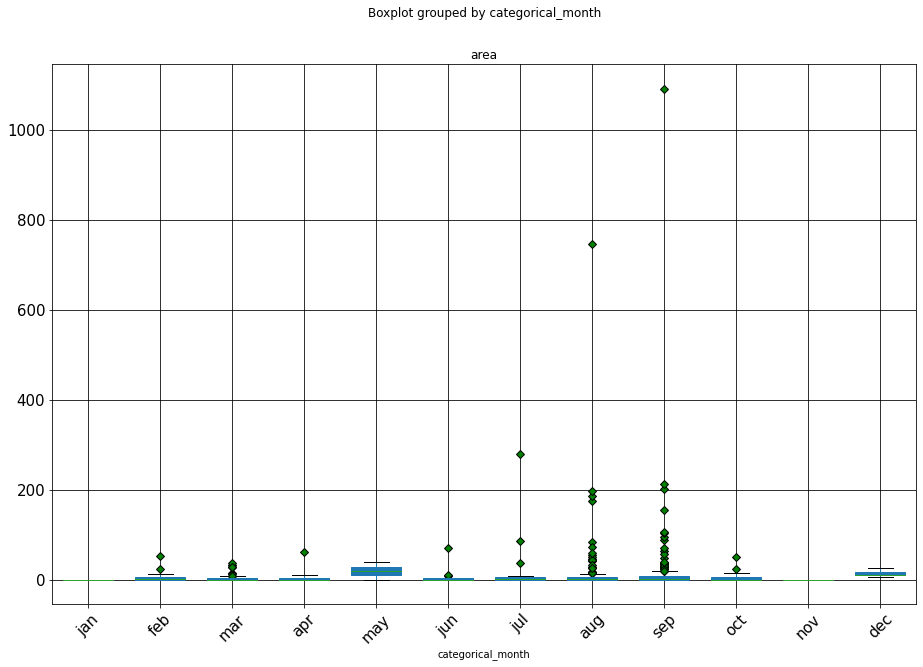

In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15,10)
pd.options.mode.chained_assignment = None
green_diamond = dict(markerfacecolor='g', marker='D')
axes = sm.boxplot(by ='categorical_month', column=['area'], rot=45, fontsize=15, widths = 0.7, patch_artist = True, grid=True, flierprops=green_diamond)
axes.grid(color='black')

In [ ]:
sm1 = sm[sm['area'] < 600] # Filtering the series (that is obtained by sorting months) that has area less than 600 ha as the two outliers above 600 ha is compressing the boxplots which is making the visualization difficult to analyze. 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,categorical_month,categorical_month_number
104,2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00,jan,1
379,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,jan,1
96,3,4,feb,sat,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00,feb,2
59,2,2,feb,fri,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00,feb,2
202,7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05,feb,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,8,6,dec,wed,84.0,27.8,354.6,5.3,5.1,61,8.0,0.0,11.19,dec,12
281,6,5,dec,tue,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,dec,12
273,4,6,dec,sun,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98,dec,12
279,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77,dec,12


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


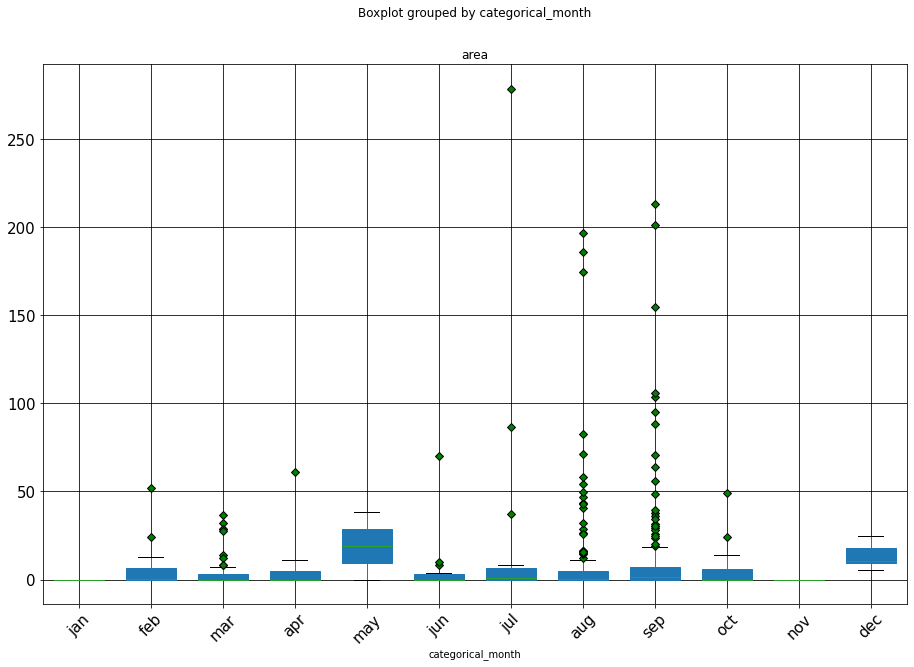

In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15,10)
pd.options.mode.chained_assignment = None
green_diamond = dict(markerfacecolor='g', marker='D')
axes = sm1.boxplot(by ='categorical_month', column=['area'], rot=45, fontsize=15, widths = 0.7, patch_artist = True, grid=True, flierprops=green_diamond)
axes.grid(color='black')

**Exploration Step1: Which months are most likely to have forest fires?**

In [ ]:
Temp = sm.groupby(['categorical_month'])[['month']].count()
Temp = Temp.rename(columns={"area": "total_area_burnt"})
Temp

,month
categorical_month,
jan,2
feb,20
mar,54
apr,9
may,2
jun,17
jul,32
aug,184
sep,172


Text(0.5, 1.0, 'Count of Forest fires by Month')

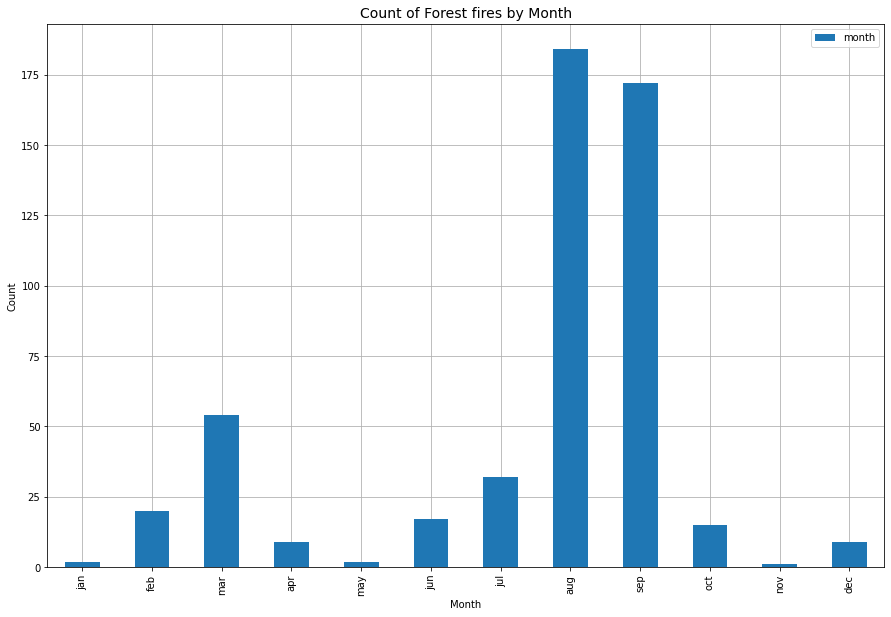

In [ ]:
Temp.plot.bar(linewidth=1,zorder=3,grid= True)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of Forest fires by Month', loc='Center', fontsize=14)



**Observation :** Months of August, September, March followed by July are most likely to have forest fires and are less likely to happen in November.

**Exploration step 2: Of the top three months, which day(s) have the most burn (total area)?**

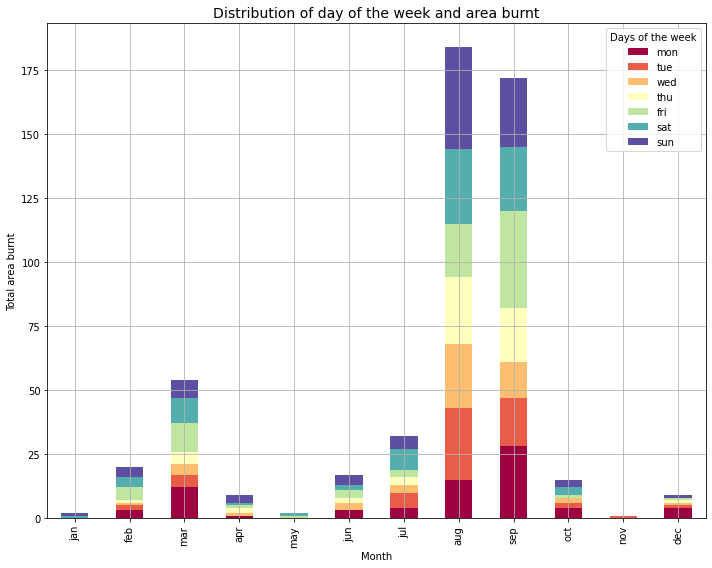

In [ ]:
# Of the top three months, which day(s) have the most burn (total area)?
month_area= pd.DataFrame()
sm['categorical_day']=sd['categorical_day']
month_area['Area_burnt']= sm.groupby(['categorical_month','categorical_day'])['area'].count()

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
month_area.pivot_table(index='categorical_month', columns='categorical_day', values='Area_burnt', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral").legend(title="Days of the week",bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Month', fontsize=10)
plt.ylabel('Total area burnt', fontsize=10)
plt.title('Distribution of day of the week and area burnt', loc='Center', fontsize=14)
plt.show()

**Observation:** From the plot we can observe that sundays,saturday and fridays have highest amount area burnt.

**Exploration Step 3: What day(s) of the week are the forest fires most likely to start on?**

In [ ]:
Temp1 = sd.groupby(['categorical_day'])[['day']].count()
Temp1 = Temp1.rename(columns={"day": "Count"})


Text(0.5, 1.0, 'Count of Forest fires by day of the week')

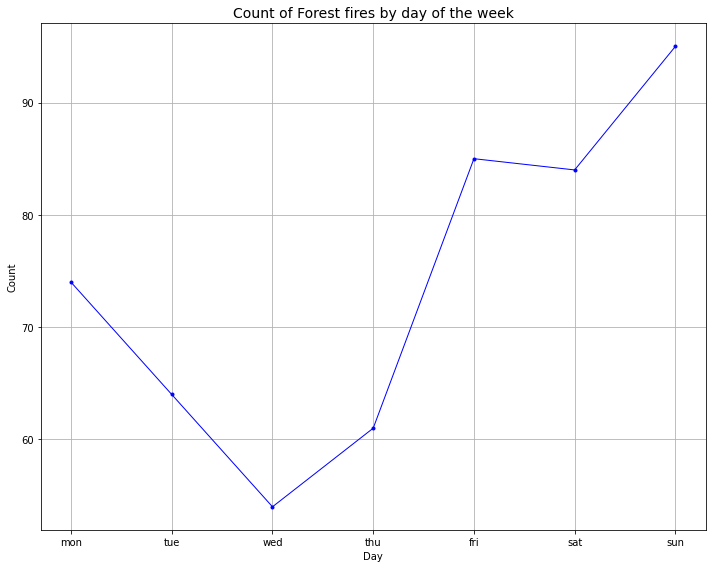

In [ ]:
plt.grid(zorder=0)
plt.plot(Temp1.index, 'Count', data=Temp1, color='blue', marker = ".", linewidth=1, scalex=True,scaley=True, zorder=3)
plt.xlabel('Day', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of Forest fires by day of the week', loc='Center', fontsize=14)

**Observation :** Fires are most likely to start on sundays, fridays, saturdays followed by mondays and less likely on wednessdays.

**Exploration step 3: Is there any correlation between forest fires and rainfall ?**

In [ ]:
# To find out i am using rainfall column and count of fires occured
Temp2 = dff.groupby(['rain'])[['day']].count()
Temp2 = Temp2.rename(columns={"day": "Count"})

Text(0.5, 1.0, 'Count of Forest fires by amount of rainfall')

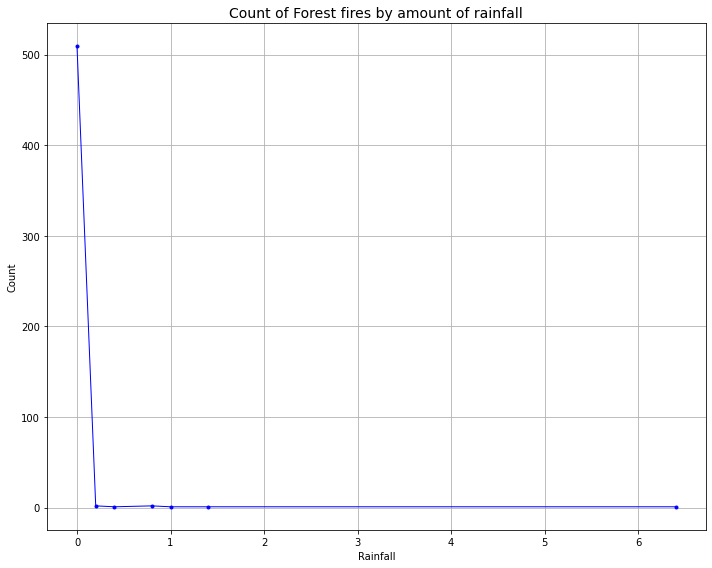

In [ ]:
plt.grid(zorder=0)
plt.plot(Temp2.index, 'Count', data=Temp2, color='blue', marker = ".", linewidth=1, scalex=True,scaley=True, zorder=3)
plt.xlabel('Rainfall', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of Forest fires by amount of rainfall', loc='Center', fontsize=14)

**Exploration step 4: What variable (temp, RH, wind) is most predictive of a fire?**

In [ ]:
# To findout i'm using the correlation matrix for temp,RH and wind along with the area burnt.
dff.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,categorical_month_number,categorical_day_number
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385,-0.065003,NaN
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873,-0.066292,NaN
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.291477,NaN
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,0.466645,NaN
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,0.868698,NaN
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.186597,NaN
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,0.368842,NaN
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,-0.095280,NaN
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,-0.086368,NaN
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,0.013438,NaN


**Observation:** From the correlation we can see that area burnt has high correlation with temp than wind and RH.

**Conclusion:**

> 1.	Forest fires are mostly likely to occur in August, September, July and March. This may be due to the high temperatures or low humidity or low rainfall in those months.
2. The top three months having more forest fires are august,september and march. In those months sundays, fridays and saturdays have highest amount areas burnt.
3. But high occurrence of forest fires on days of the week were recorded on Sundays which does not seem to have any valid explanation by the provided parameters or indicators.	 
4.Of temp, wind, RH factors, temp has correlation with the amount of area burnt. So, temp acts most predictive factor for fires.



